In [7]:
library(ggplot2)
library(grid)
library(gridExtra)
library(glue)
library(uwot)
library(hexbin)
library(cowplot)


In [14]:
plot_UMAP <- function(filename){
  out <- readRDS(filename)
  PCA_emb <- out$embeddings
  state <- out$max_continuums[,"State_1"]
  ct_labels <- data.frame(out$ct_labels)
  colnames(ct_labels) <- "ct_label"   
  UMAP_out = umap(PCA_emb, n_neighbors=30L,metric = "cosine",n_components = 2L,learning_rate = 1,min_dist = 0.3,spread = 1,
    set_op_mix_ratio = 1,
    local_connectivity = 1L,
    repulsion_strength = 1,
    negative_sample_rate = 5,
    a = NULL,
    b = NULL,
    verbose = TRUE)

  UMAP_out = data.frame(UMAP_out)
  colnames(UMAP_out) <- c("X1","X2")
  UMAP_out = cbind(UMAP_out,ct_labels)
  
  p1 = ggplot(UMAP_out, aes(x=X1, y=X2,color=ct_label)) + geom_point() + theme_classic() + labs(x = "UMAP 1", y = "UMAP 2") + labs(color = "Cell Type") + theme(
    text = element_text(size = 25),
    plot.title = element_text(size = 25),
    legend.text = element_text(size = 25)  # Adjust the legend text size as needed
  ) +
  guides(color = guide_legend(override.aes = list(size = 5)))  # Adjust the legend key size as needed   # Adjust the legend text size as needed
      
    
  p2 = ggplot(cbind(data.frame(UMAP_out), data.frame(state) ), aes(x=X1, y = X2,z=state) ) +
        stat_summary_hex(fun = function(x) mean(x),bins = 400,binwidth=c(0.2,0.2)) +
        scale_fill_gradient2(low="red",  mid="gray", high="red",name = "State Continuum")+ ggtitle(glue('') )+theme_bw()+ theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) + labs(x = "UMAP 1", y = "UMAP 2") + theme(
      text = element_text(size = 25),
      plot.title = element_text(size = 25),
      legend.text = element_text(size = 25)  # Adjust the legend text size as needed
      
    )

  return(list(p1 = p1, p2 = p2) )

}



In [15]:
plot_state_emb <- function(filename) {
  out <- readRDS(filename)
  PCA_emb <- out$embeddings
  state <- out$max_continuums[,"State_1"]
  ct_labels <- data.frame(out$ct_labels)
  colnames(ct_labels) <- "ct_label"
  corr_sq <- cor(PCA_emb, state)^2
  method = "PCA"
  if (grepl("cond_PCA", filename)) {
    method = "CondPCA"
  }
  if (grepl("within", filename)) {
    CT = unique(ct_labels[state != 0,])
    sub_emb = PCA_emb[ct_labels == CT,]
    sub_state = state[ct_labels['ct_label'] == CT]
    corr_sq = cor(sub_emb, sub_state)^2

  }
  tmp_df <- cbind(data.frame(emb = scale(PCA_emb[, which(corr_sq == max(corr_sq))])),
                  data.frame(state),
                  ct_labels)
  tmp_df$ct_label <- factor(tmp_df$ct_label)
  
  p <- ggplot(tmp_df, aes(x = emb, y = state, color = ct_label)) +
  geom_point() +
  theme_classic() +
  labs(color = "Cell Type") +
  ylab("True State Continuum") +
  xlab(glue("PC {which(corr_sq == max(corr_sq))}")) +
  ggtitle(glue('{method}: Max. Squared Correlation between PC {which(corr_sq == max(corr_sq))} and True State: {round(max(corr_sq), 3)}')) +
  theme(
    text = element_text(size = 25),
    plot.title = element_text(size = 25),
    legend.text = element_text(size = 25)  # Adjust the legend text size as needed
  ) +
  guides(color = guide_legend(override.aes = list(size = 5)))  # Adjust the legend key size as needed
    

  return(p)
}

16:36:41 UMAP embedding parameters a = 0.9922 b = 1.112

16:36:41 Converting dataframe to numerical matrix

16:36:41 Read 20000 rows and found 30 numeric columns

16:36:41 Using Annoy for neighbor search, n_neighbors = 30

16:36:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:36:42 Writing NN index file to temp file /var/folders/1b/d3mmyllj1jg4btvm4vqztkdh0000gp/T//RtmpTugfni/file144351afec1ea

16:36:42 Searching Annoy index using 5 threads, search_k = 3000

16:36:44 Annoy recall = 100%

16:36:44 Commencing smooth kNN distance calibration using 5 threads
 with target n_neighbors = 30

16:36:44 Found 3 connected components, 
falling back to 'spca' initialization with init_sdev = 1

16:36:44 Using 'irlba' for PCA

16:36:44 PCA: 2 components explained 54.97% varianc

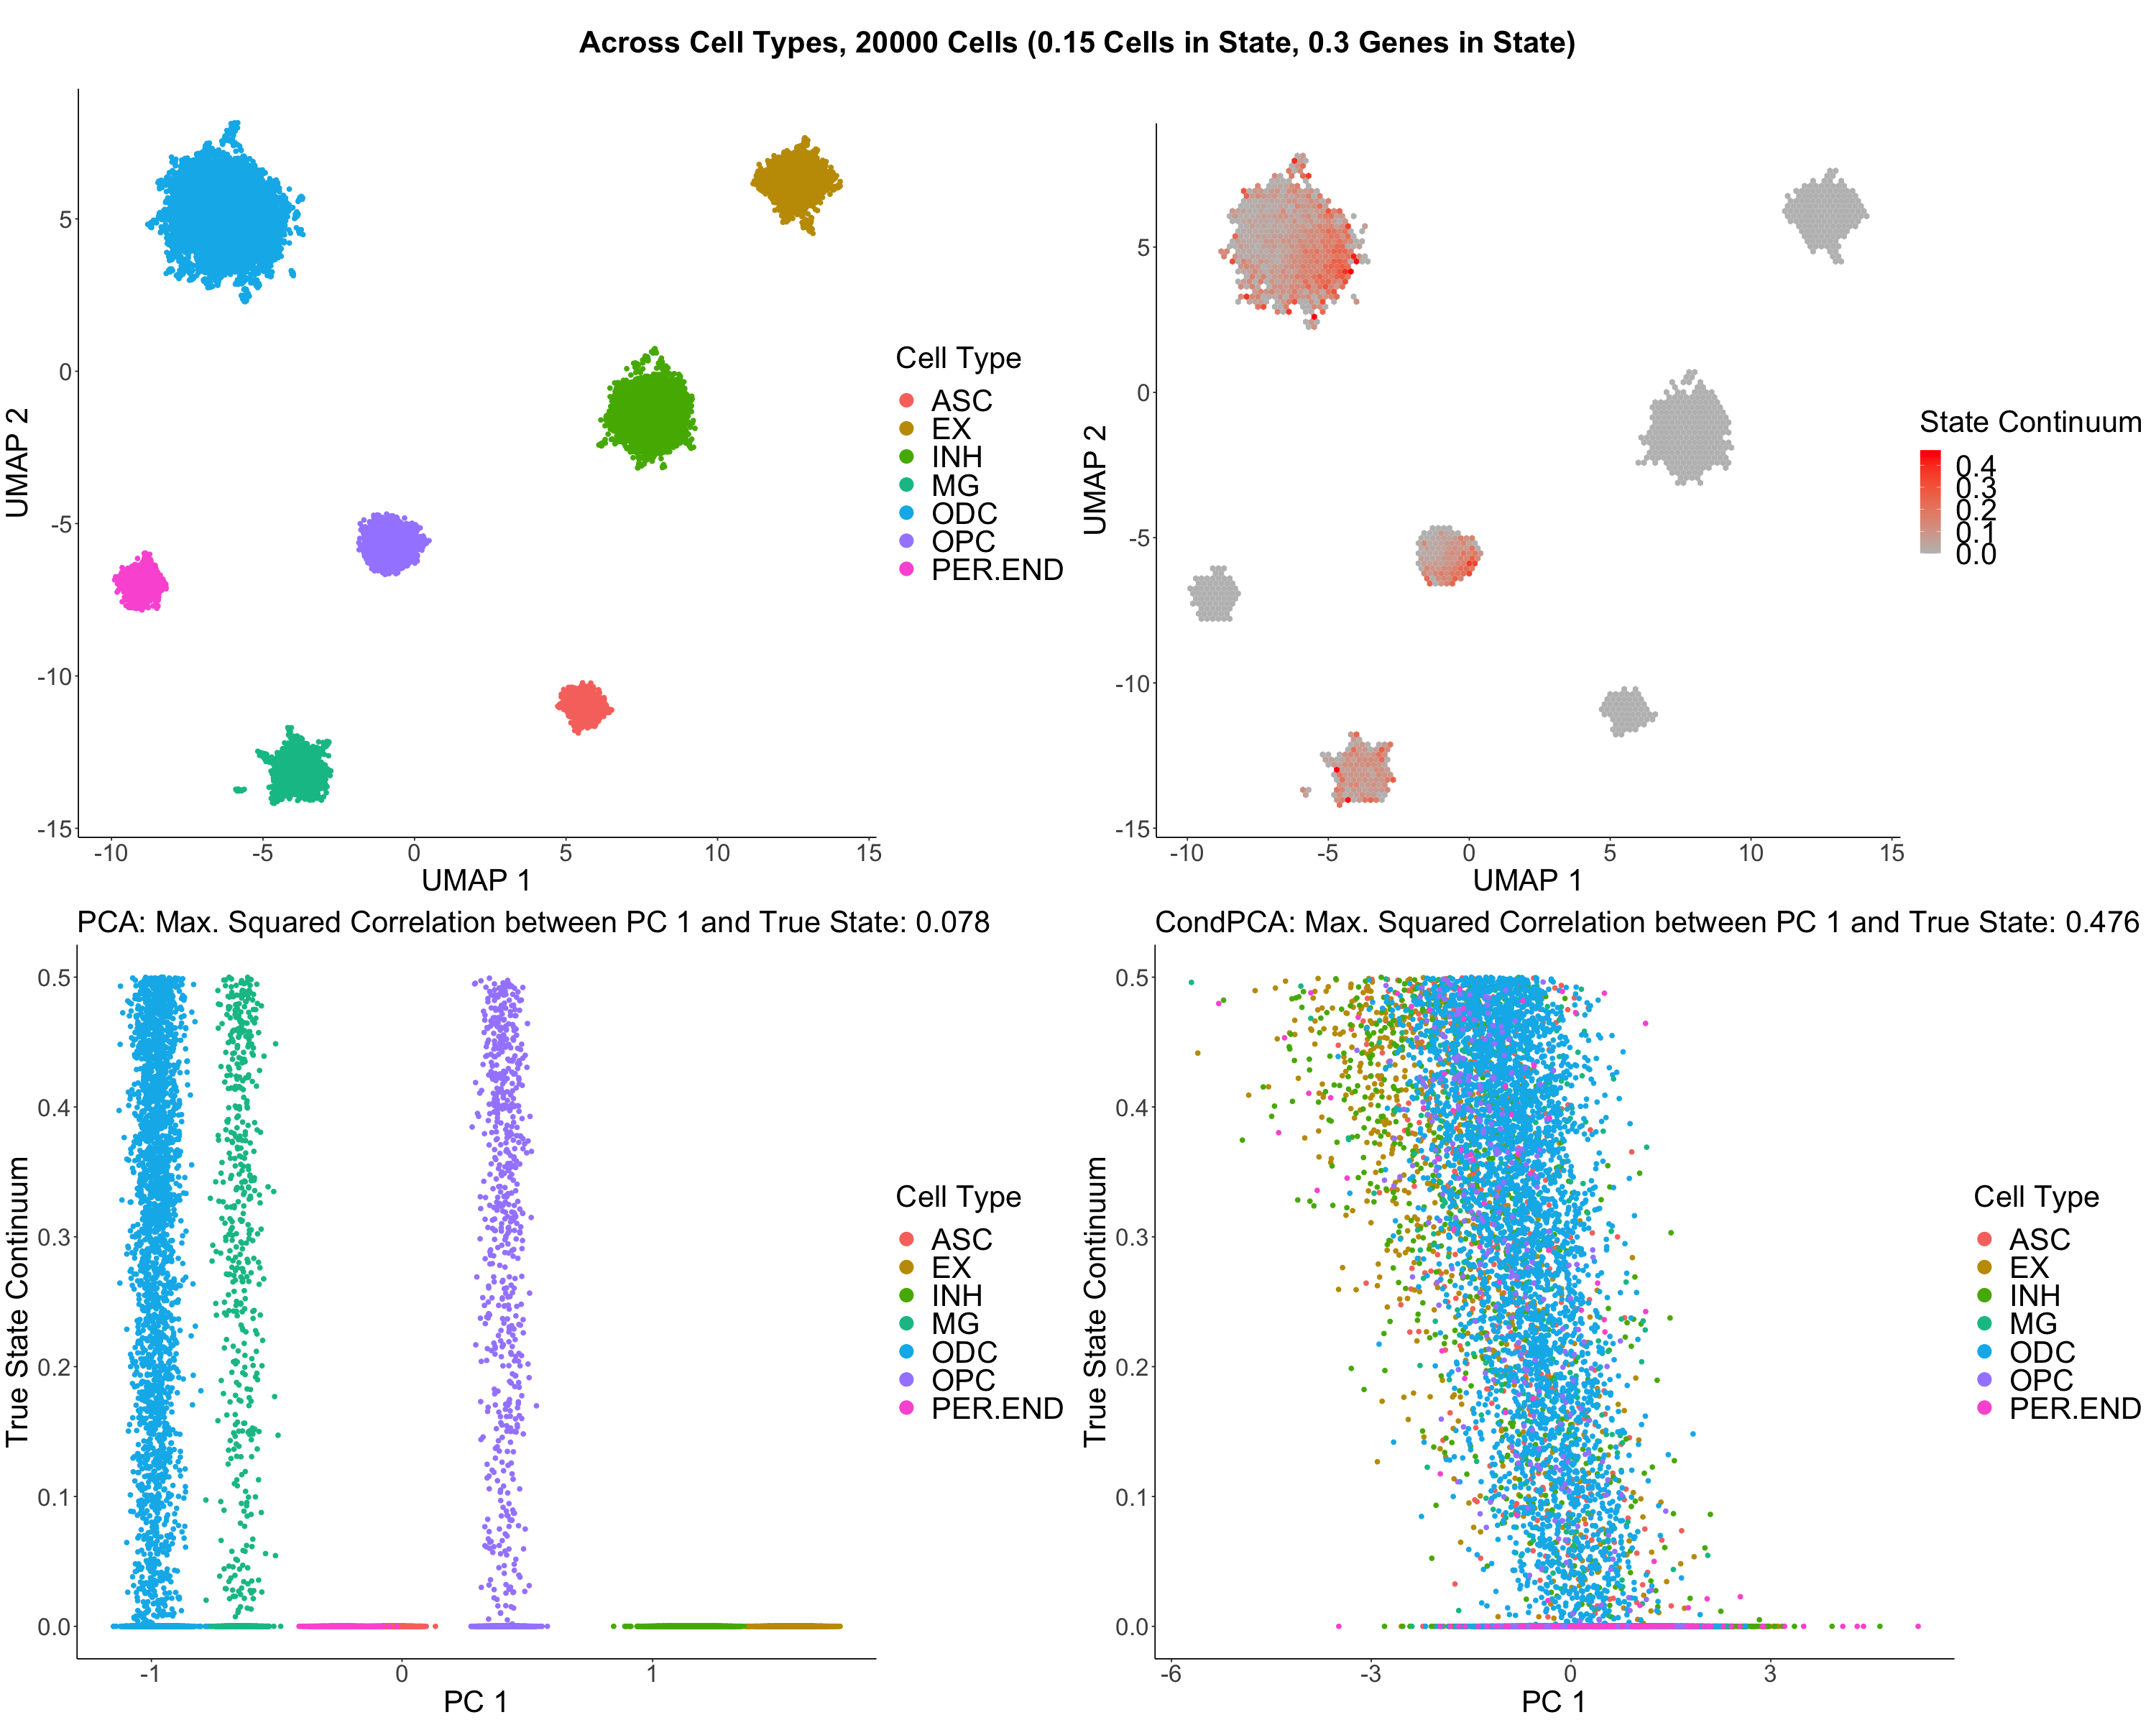

In [19]:
plot("Across Cell Types, 20000 Cells (0.15 Cells in State, 0.3 Genes in State)","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/PCA_across_cts_allcts_0.15_0.3_seed3_20000_dim30.rds","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/cond_PCA_across_cts_allcts_0.15_0.3_seed3_20000_dim30.rds")



16:36:55 UMAP embedding parameters a = 0.9922 b = 1.112

16:36:55 Converting dataframe to numerical matrix

16:36:55 Read 20004 rows and found 30 numeric columns

16:36:55 Using Annoy for neighbor search, n_neighbors = 30

16:36:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:36:57 Writing NN index file to temp file /var/folders/1b/d3mmyllj1jg4btvm4vqztkdh0000gp/T//RtmpTugfni/file144355eec97e1

16:36:57 Searching Annoy index using 5 threads, search_k = 3000

16:36:58 Annoy recall = 100%

16:36:58 Commencing smooth kNN distance calibration using 5 threads
 with target n_neighbors = 30

16:36:59 Initializing from normalized Laplacian + noise (using irlba)

16:37:02 Commencing optimization for 200 epochs, with 1016658 positive edges

16:37:11 Optimization finished



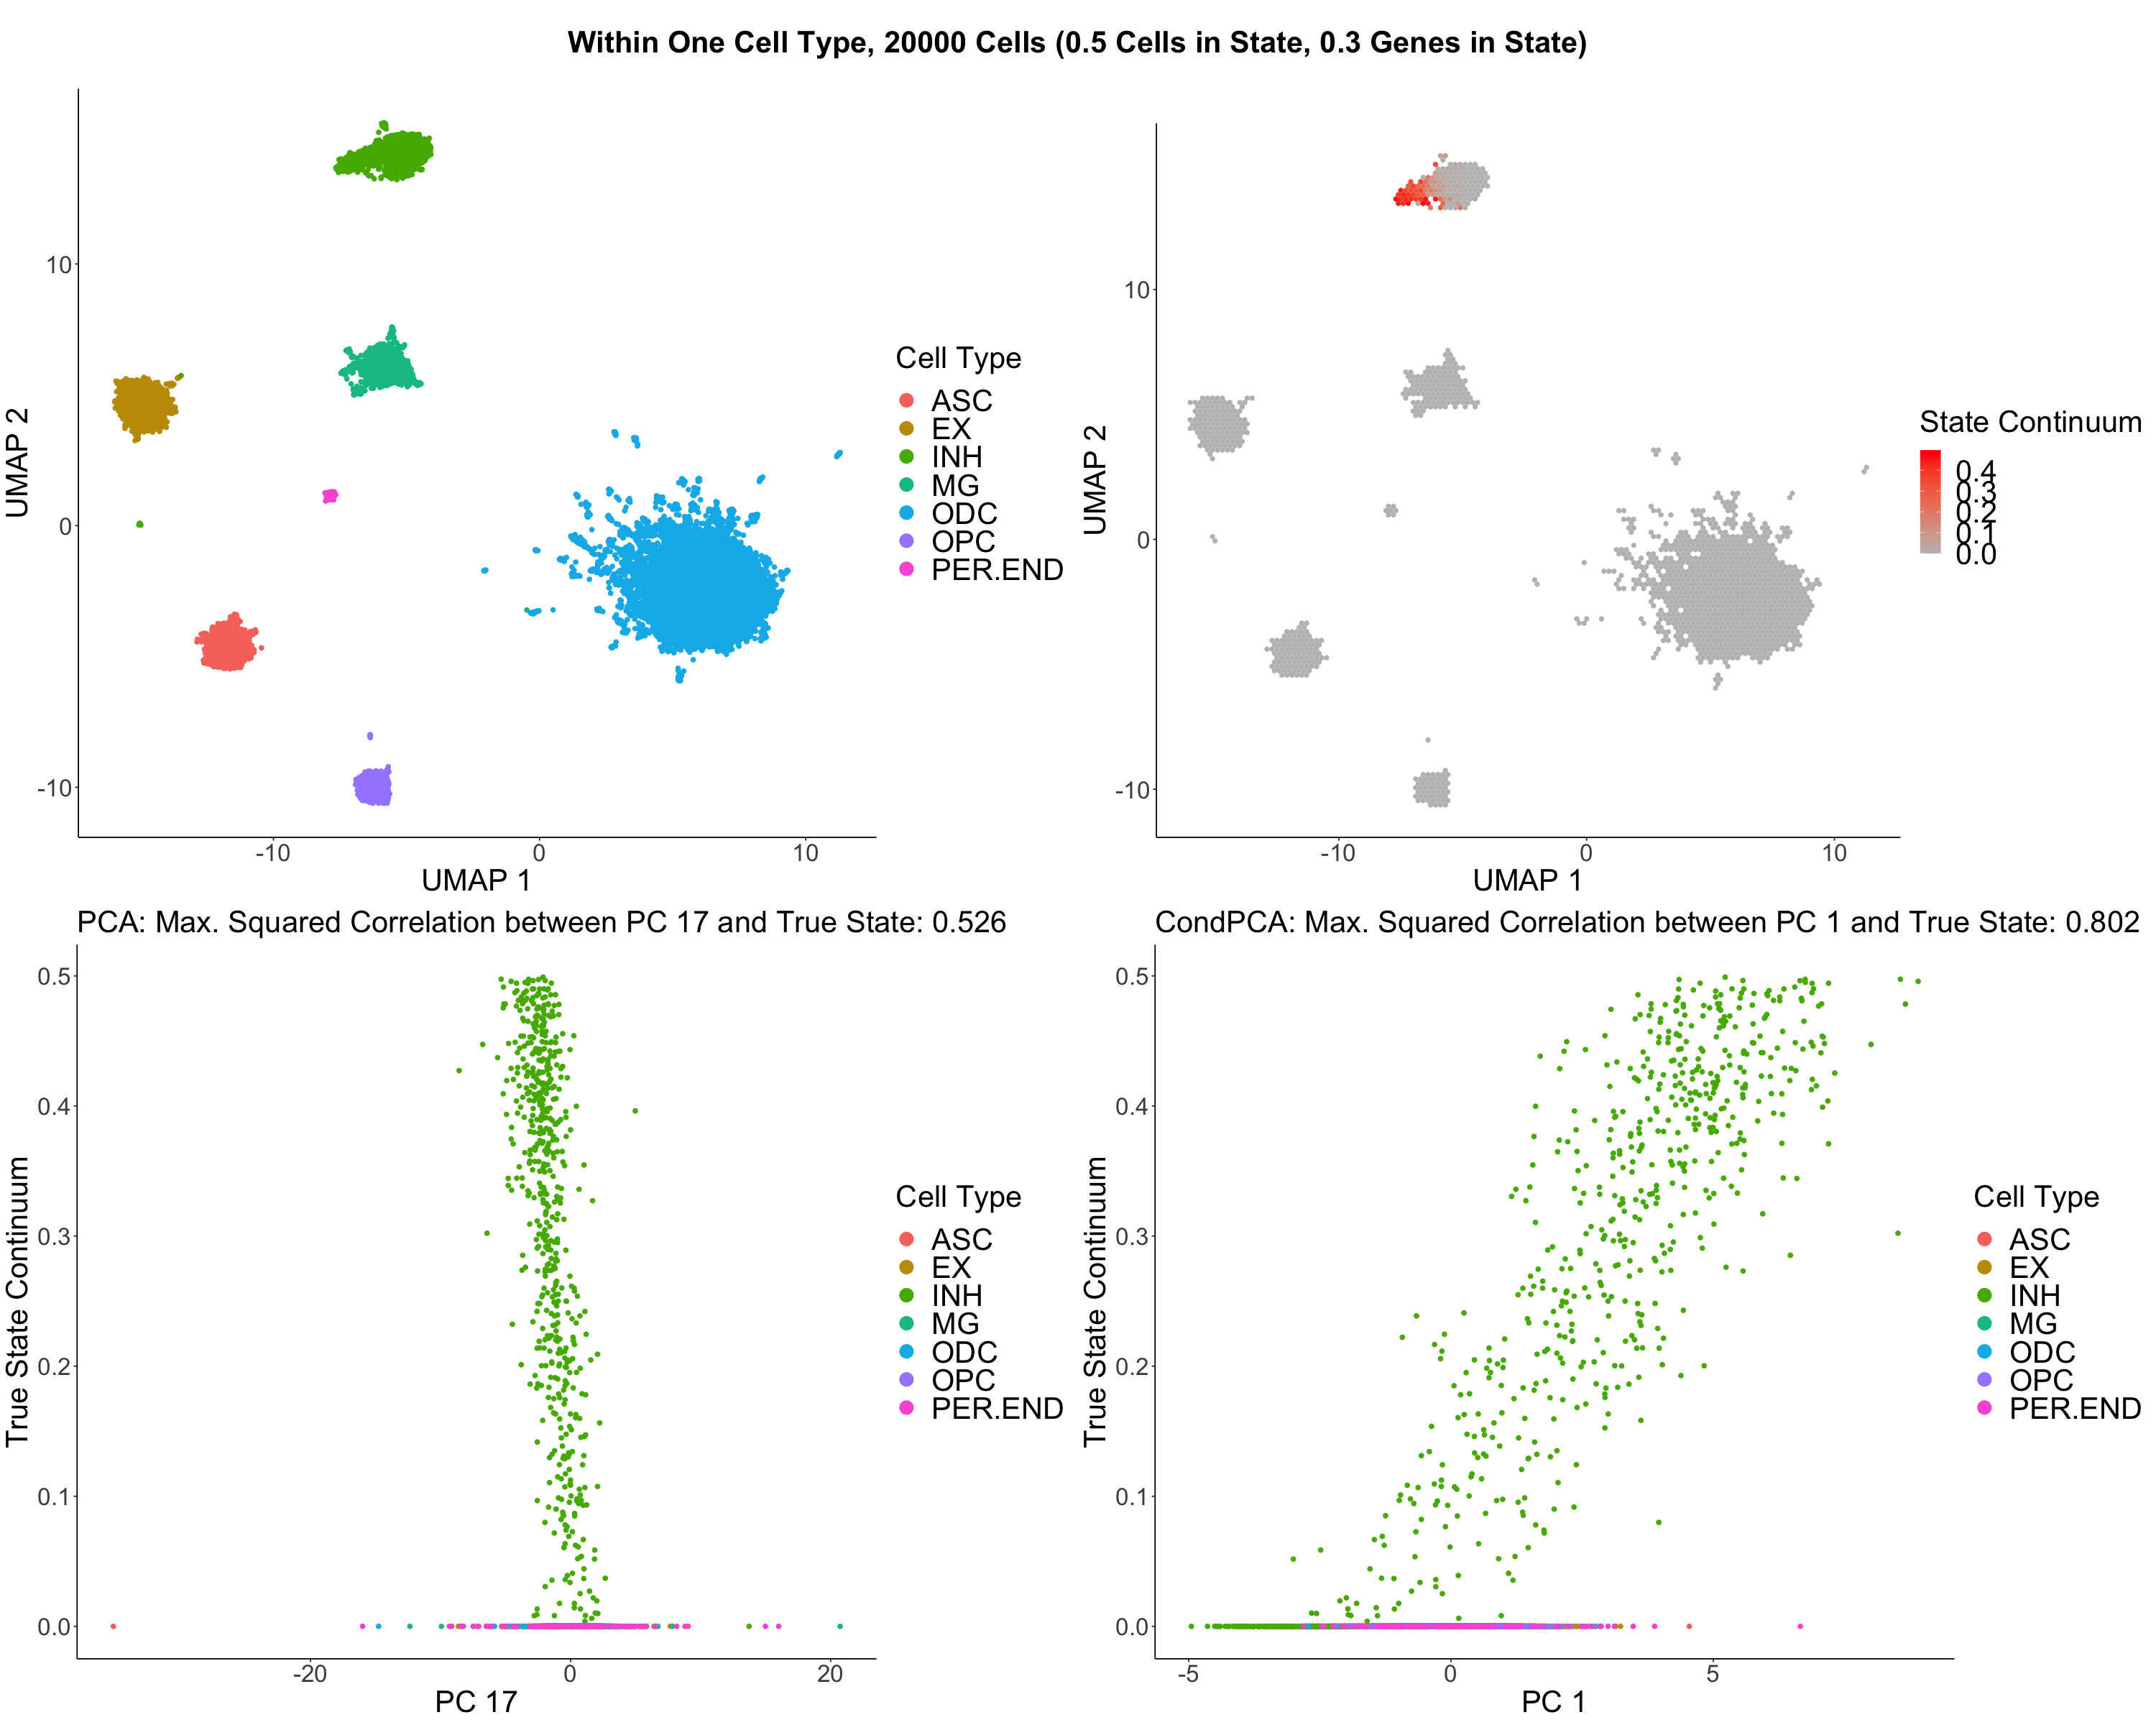

In [20]:
plot("Within One Cell Type, 20000 Cells (0.5 Cells in State, 0.3 Genes in State)","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/PCA_within_one_ct_allcts_0.5_0.3_seed9_20000_dim30.rds","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/cond_PCA_within_one_ct_allcts_0.5_0.3_seed9_20000_dim30.rds")


16:39:09 UMAP embedding parameters a = 0.9922 b = 1.112

16:39:09 Converting dataframe to numerical matrix

16:39:09 Read 20004 rows and found 50 numeric columns

16:39:09 Using Annoy for neighbor search, n_neighbors = 30

16:39:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:39:11 Writing NN index file to temp file /var/folders/1b/d3mmyllj1jg4btvm4vqztkdh0000gp/T//RtmpTugfni/file144359b66711

16:39:11 Searching Annoy index using 5 threads, search_k = 3000

16:39:12 Annoy recall = 100%

16:39:13 Commencing smooth kNN distance calibration using 5 threads
 with target n_neighbors = 30

16:39:13 Initializing from normalized Laplacian + noise (using irlba)

16:39:16 Commencing optimization for 200 epochs, with 1052158 positive edges

16:39:25 Optimization finished



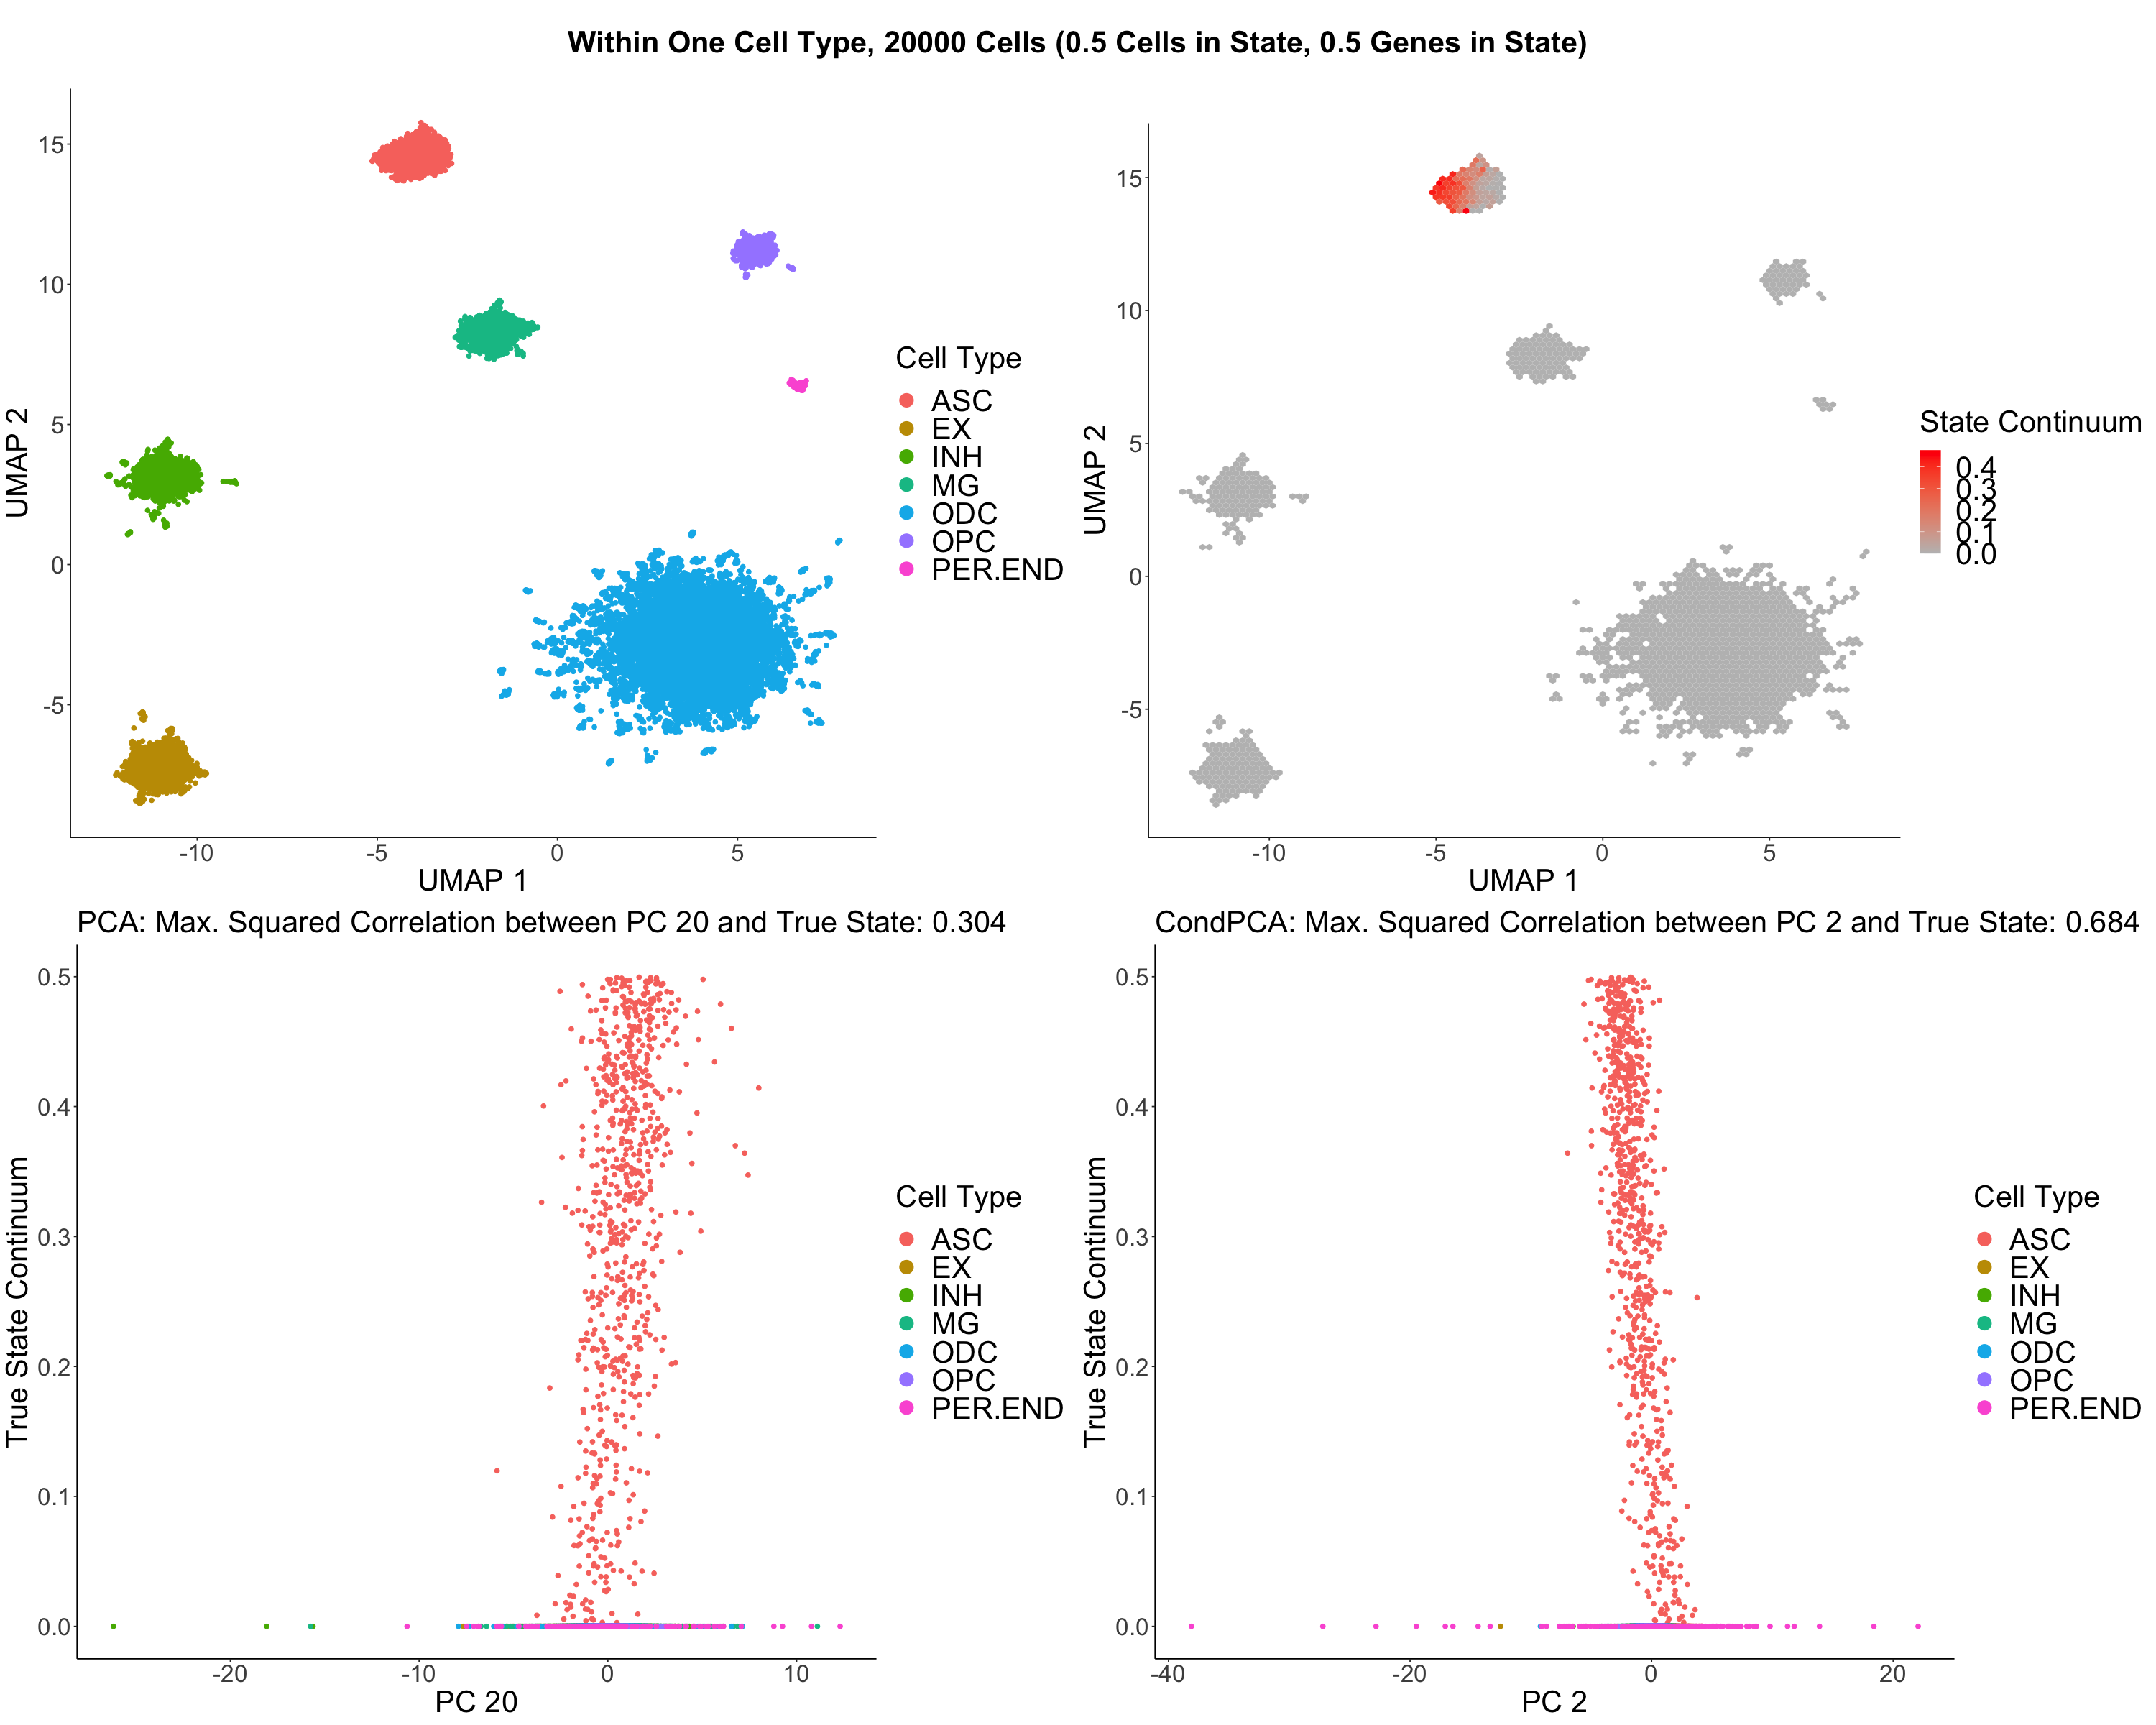

In [22]:
plot("Within One Cell Type, 20000 Cells (0.5 Cells in State, 0.5 Genes in State)","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/PCA_within_one_ct_allcts_0.5_0.5_seed1_20000_dim50.rds","/Users/shayecarver/condPCA/Gamma-Pois_Simulation/example_simulations/cond_PCA_within_one_ct_allcts_0.5_0.5_seed1_20000_dim50.rds")
